<a href="https://colab.research.google.com/github/Alejovm24/IA_MECA_USTABUCA/blob/main/Taller_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [137]:
!pip install scikit-fuzzy

In [138]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

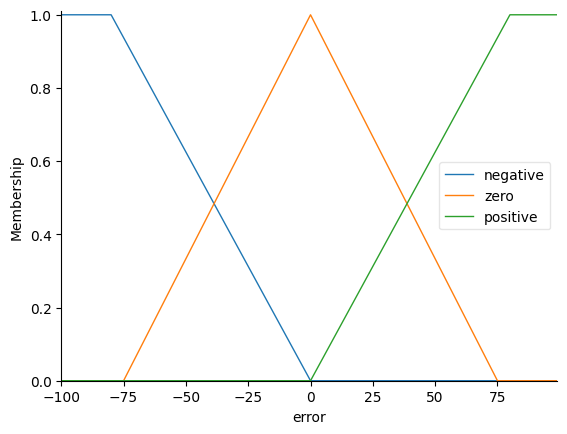

In [157]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-80,0])
error['zero'] = fuzz.trimf(error.universe,[-75,0,75])
error['positive'] = fuzz.trapmf(error.universe,[0,80,100,100])
error.view()

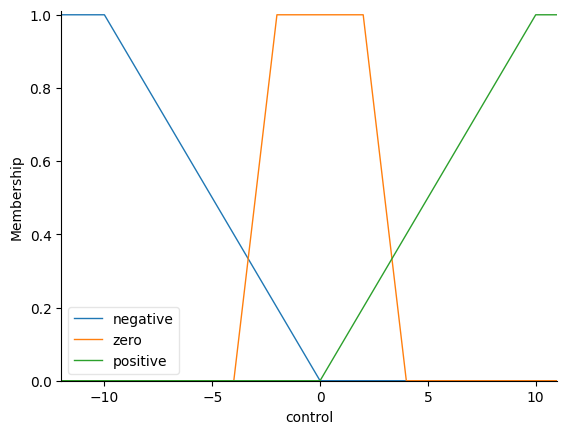

In [199]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,0])
control['zero'] = fuzz.trapmf(control.universe,[-4,-2,2,4])
control['positive'] = fuzz.trapmf(control.universe,[0,10,12,12])
control.view()

### **PASO 3. Inferencia**

In [200]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [201]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

Salida defuzzificada = 2.954686600624072
Salida defuzzificada  redondeada= 2.95


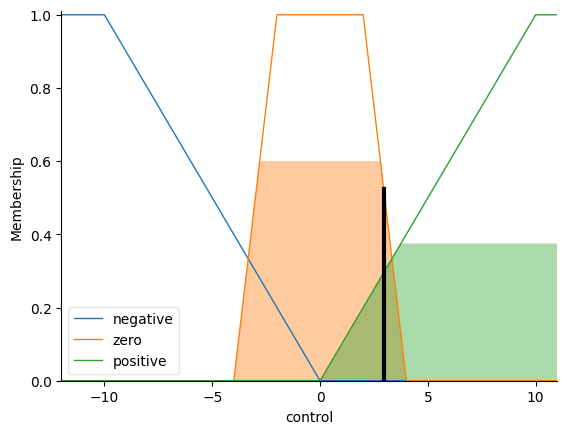

In [202]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [203]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [204]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

In [205]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acción de control [V]')

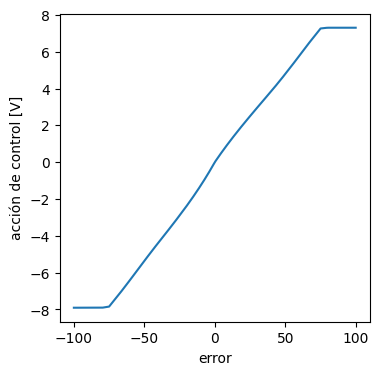

In [206]:
fig = plt.figure(figsize=(4, 4))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

La relacion entre el error y la accion de control se tiene que en la accion de control empieza a haber cambios desde un error de -75, antes no se registra cambios, desde -75 hasta 75 se tiene una accion casi proporcional al error, aunque aun asi se puede apreciar una pequeña variacion pero no tan perceptible; ya despues de un error de 75 no cambia la accion de control.
Todo esto se obtuvo variando los rangos y un poco las dimensiones de los mismos